In [26]:
%matplotlib inline

from __future__ import print_function

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split

In [58]:
df_put_x = np.array(pd.read_csv("put_coord_x.csv.gz")[range(4,16)])
df_put_y = np.array(pd.read_csv("put_coord_y.csv.gz")[range(4,16)])
df_put_z = np.array(pd.read_csv("put_coord_z.csv.gz")[range(4,16)])

df_cdr_x = np.array(pd.read_csv("real_coord_x.csv.gz")[range(4,16)])
df_cdr_y = np.array(pd.read_csv("real_coord_y.csv.gz")[range(4,16)])
df_cdr_z = np.array(pd.read_csv("real_coord_z.csv.gz")[range(4,16)])

In [16]:
df_put_x.shape

(74528, 12)

In [18]:
df_put_x

array([[ 2.43586689,  3.90127186,  5.11286228, ...,  7.66770127,
         7.87269825,  6.05443855],
       [ 2.60804342,  3.50015585,  5.65116245, ...,  8.72463337,
         7.98241625,  6.06922823],
       [ 2.55962382,  3.27993583,  5.19256306, ...,  8.22119058,
         7.53734334,  6.00559035],
       ..., 
       [ 3.29322052,  3.20848284,  5.27442084, ...,  8.76933968,
         8.33344055,  8.52947466],
       [ 2.11197878,  3.28549125,  4.62475713, ...,  8.01860187,
         7.83522091,  5.5764344 ],
       [ 2.20332744,  3.24815293,  4.42216548, ...,  8.02087017,
         7.97029427,  5.7988132 ]])

In [21]:
df_cdr_x.shape

(69, 12)

# Z ~ X+Y

In [63]:
for i in range(12):
    clf = LinearRegression(n_jobs=12)
    val = cross_val_score(clf, np.hstack([df_put_x[:,i], df_put_y[:,i]]).reshape((74528, 2)), df_put_z[:,i].reshape((74528,)), cv=10)
    print(i, ":", val.mean(), val.std())

0 : -0.00248699446653 0.00285925494595
1 : -0.00191991594045 0.00163396751813
2 : -0.00228329050212 0.00197020998212
3 : -0.00296635158089 0.00258995407574
4 : -0.00226061253744 0.0035513445859
5 : -0.00134721586251 0.00240254620867
6 : -0.00236206824339 0.00264135268318
7 : -0.00318462445631 0.00343313561609
8 : -0.00229832651758 0.00218701885113
9 : -0.00144017667629 0.000951347390992
10 : -0.00196221771892 0.00252774682047
11 : -0.00269058245372 0.00266234323021


In [57]:
for i in range(12):
    clf = ElasticNetCV(cv=10, n_jobs=12)
    val = cross_val_score(clf, np.hstack([df_put_x[:,i], df_put_y[:,i]]).reshape((74528, 2)), df_put_z[:,i].reshape((74528,)), cv=10)
    print(i, ":", val.mean(), val.std())

0 : -0.0026398365841 0.00276185194683
1 : -0.00176091743392 0.00149203663874
2 : -0.00228243051746 0.00197263754943
3 : -0.00294576155888 0.00259150095227
4 : -0.00223891121675 0.00345143345518
5 : -0.00128309944396 0.00240458018775
6 : -0.00225685927999 0.00257236983287
7 : -0.00322899329933 0.00342071468888
8 : -0.00229520613421 0.00224810544553
9 : -0.00135408066473 0.0009000323125
10 : -0.00185924728089 0.00237741244011
11 : -0.00287706927723 0.00255657663236


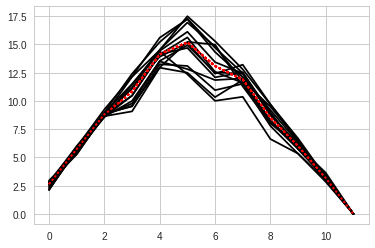

In [65]:
fig, ax = plt.subplots(1,1)


# pred = np.zeros((24595,12))
# y_test_arr = np.zeros((24595,12))
# for i in range(12):
#     X_train, X_test, y_train, y_test = train_test_split(np.hstack([df_put_x[:,i], df_put_y[:,i]]).reshape((74528, 2)), 
#                                                         df_put_z[:,i].reshape((74528,)), test_size=.33, 
#                                                         random_state=42)
#     clf = ElasticNetCV(cv=10, n_jobs=12, normalize=False)
#     clf.fit(X_train, y_train)
#     pred[:,i] = clf.predict(X_test)
#     y_test_arr[:,i] = y_test
    
    
for i in range(14):
    ax.plot(range(12), y_test_arr[i], c="black")#, alpha=.05)
    ax.plot(range(12), pred[i], c="red", linestyle="dotted")#, alpha=.05)
    
# for i in range(500, 1000):
#     ax.plot(range(12), y_test_arr[i], c="black", alpha=.05)
#     ax.plot(range(12), pred[i], c="dodgerblue", linestyle="dotted", alpha=.05)

In [48]:
clf = RandomForestRegressor(300, n_jobs=12)
cross_val_score(clf, np.hstack([df_put_x[:,1], df_put_y[:,1]]).reshape((74528, 2)), df_put_z[:,1].reshape((74528,)), cv=3)

array([-0.39043807, -0.4179993 , -0.42868115])

In [47]:
clf = RandomForestRegressor(1000, n_jobs=12)
cross_val_score(clf, np.hstack([df_put_x[:,1], df_put_y[:,1]]).reshape((74528, 2)), df_put_z[:,1].reshape((74528,)), cv=3)

array([-0.38747448, -0.41657679, -0.42690516])

# X ~ Y+Z

In [62]:
for i in range(12):
    clf = LinearRegression(n_jobs=12)
    val = cross_val_score(clf, np.hstack([df_put_y[:,i], df_put_z[:,i]]).reshape((74528, 2)), df_put_x[:,i].reshape((74528,)), cv=3)
    print(i, ":", val.mean(), val.std())

0 : -0.0028151402829 0.00220340356093
1 : -0.000510661868694 0.000340749466002
2 : -0.000479939474096 0.000239479908334
3 : -0.000665788416044 0.000471429054541
4 : -0.000514524068902 0.000347115032062
5 : -0.000750475104955 0.000491330208821
6 : -0.00189286837666 0.00131501350156
7 : -0.000780256404555 0.000497598439006
8 : -0.000429175828487 0.000294196129239
9 : -0.000529523555579 0.000367238844508
10 : -0.000293426591378 0.000134336005972
11 : -0.00186999873361 0.00116422424194


In [59]:
for i in range(12):
    clf = ElasticNetCV(cv=10, n_jobs=12)
    val = cross_val_score(clf, np.hstack([df_put_y[:,i], df_put_z[:,i]]).reshape((74528, 2)), df_put_x[:,i].reshape((74528,)), cv=10)
    print(i, ":", val.mean(), val.std())

0 : -0.0026398365841 0.00276185194683
1 : -0.00176091743392 0.00149203663874
2 : -0.00228243051746 0.00197263754943
3 : -0.00294576155888 0.00259150095227
4 : -0.00223891121675 0.00345143345518
5 : -0.00128309944396 0.00240458018775
6 : -0.00225685927999 0.00257236983287
7 : -0.00322899329933 0.00342071468888
8 : -0.00229520613421 0.00224810544553
9 : -0.00135408066473 0.0009000323125
10 : -0.00185924728089 0.00237741244011
11 : -0.00287706927723 0.00255657663236
